# Computer Assignment 4

## Student names and student numbers: (edit this)
- Theo Koenig (4922301)
- Tip ten Brink (4927192)

### General TA feedback:

## Problem 1 : Fermi Statistics in a Closed System

### Exercise 1 : x/6 points

**TA Feedback:**

$$f_{FD} = \frac{1}{e^{\beta(E_r - \mu)} + 1}$$

From the above shown Fermi-Dirac distribution function, it is straightforward to see that the it is always smaller than or equal to 1. The denominator must simply be greater than or equal to 1. Seeing as the exponential factor is real, it never goes below 0 and the denominator therefore satisfies the condition:

$$e^{\beta(E_r - \mu)} + 1 \geq 1.$$

$$f_{BE} = \frac{1}{e^{\beta(E_r - \mu)} - 1}$$

Again, from the Bose-Einstein distribution function shown above, it is relatively simple to see that $\mu$ must be smaller than the ground state energy. If we were to assume that a $\mu$ larger than $E_r$ is possible then the distribution would become negative as the exponential becomes smaller than 1. This would mean that the number of particles in the state would be negative. If $\mu$ is equal to the ground state energy then there would be an infinite number of particles in the lowest single-particle state as the denominator goes to zero. Therefore $\mu$ must always be smaller than $E_r$.

### Exercise 2 : x/6 points

**TA Feedback:**

The ground state is the state in which all the particles have minimum energy. Since we have fermions,
each energy state can only be occupied by one particle. So we have a fermion occupying the first ten energy states,
$E_1$ to $E_{10}$. So the total system energy is the sum of these energies. Since $E_n = n\epsilon$ and we take
$\epsilon = 1$, the energy is equal to $1 + 2 + ... + 10 = 55$.

### Exercise 3 : x/12 points

**TA Feedback:**

Five more than the ground state of $55$ means there is a total energy of $60$.

**Hint** : use the following table. The two rows are just to show you _how_ the table works for $4$ fermions, and are _not_ correct solutions! Please delete them, and add your own correct rows. You might need to add extra columns, or you might not have to use some columns at all!

| Energy level $\rightarrow$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15
| -------------------------- | - | - | - | - | - | - | - | - | - | -- | -- | -- | -- | -- | --
|                          1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 1  | 1  |  0 |  0 | 0  |  0
|                          2 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1  | 0  |  1 |  0 | 0  |  0
|                          3 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 0  | 1  |  1 |  0 | 0  |  0
|                          4 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1  | 0  |  0 |  1 | 0  |  0
|                          5 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1  | 1  |  0 |  1 | 0  |  0
|                          6 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0  | 0  |  1 |  1 | 0  |  0
|                          7 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1  | 0  |  0 |  0 | 1  |  0
|                          8 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0  | 0  |  0 |  0 | 0  |  1


**Hint 2: occupation table** : use the following occupation table. Again, the values are fictional, just to show you how it works! You might not need all the columns, or you might need to add in additional columns.

| Level $\rightarrow$      | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15
| -------------------------| - | - | - | - | - | - | - | - | - | -- | -- | -- | -- | -- | --
| Occupation $\rightarrow$ | 1 | 1 | 1 | 1 | 1 |7/8|7/8|3/4|3/4| 5/8| 3/8| 3/8| 3/8| 1/8| 1/8

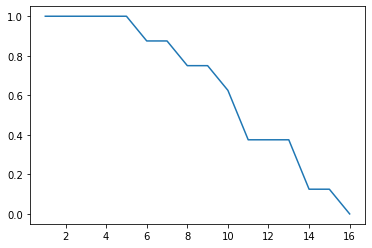

In [3]:
import matplotlib.pyplot as plt

occupations = [[1, 1], [2, 1], [3, 1], [5, 1], [6, 7/8], [7, 7/8], [8, 3/4], [9, 3/4], [10, 5/8], [11, 3/8], [12, 3/8],
               [13, 3/8], [14, 1/8], [15, 1/8], [16, 0]]
x, y = zip(*occupations)

plt.plot(x, y)

Your explanation

### Exercise 4 : x/12 points

**TA Feedback:**

Your explanation

In [ ]:
# Use the following function:
from scipy import optimize
# Use the following start position p0 = [1,7] , where 1 denotes the initial value of beta, and 7 that of mu.

Your explanation

### Exercise 5 : x/14 points

**TA Feedback:**

Your explanation

In [ ]:
# Use these standard functions to calculate the partitions, using calc_fermi(N,E) . 
# You don't need to use accel_asc, it is used inside the function calc_fermi.
def accel_asc(n, part_num):
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while (2 * x <= y) and (k<part_num-1):
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while (x <= y) and (k<part_num-1):
            a[k] = x
            a[l] = y
            yield a[:k + 2]
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield a[:k + 1]

def calc_fermi(N, E):
    p = np.zeros((1,N))
    part_cnt = 0
    for m in accel_asc(E, N):
        p[part_cnt,:len(m)] = list(reversed(m))
        part_cnt = part_cnt + 1     
        p = np.vstack((p, np.zeros(N, dtype=int)))
    p = p[:part_cnt,:]
    x_scatter = np.repeat(np.arange(0,part_cnt),N)
    p_flat = np.reshape(p[:part_cnt,:],(1,p.size))
    y_scatter = np.tile(np.arange(0,N),part_cnt) +p_flat[0,::-1]
    return x_scatter.astype(float), y_scatter, part_cnt



Your explanation

### Exercise 6 : x/12 points

**TA Feedback:**

Your explanation

In [ ]:
#Put your code here

Your explanation

### Exercise 7 : x/18 points

**TA Feedback:**

Your explanation

In [ ]:
#Put your code here

Your explanation

### Exercise 8 : x/20 points

**TA Feedback:**

Your explanation

In [ ]:
#Put your code here

Your explanation